In [55]:
%autosave 0
from __future__ import print_function

Autosave disabled


# Relative position and orientation between nucleobases #

The relative position of a nucleobase *i* in the reference frame constructed on the base *j* carries interesting information, as described in  Bottaro, Di Palma Bussi. Nucleic acids research (2014). It is possible to calculate the all the position vectors between all pairs in a molecule using the function 
```
rvecs,res = bb.dump_rvec(pdb,cutoff=2.0)
```
rvecs is a matrix with dimensions *(nframes,n,n,3)*, where *nsamples* is the number of samples in the PDB/trajectory file, and *n* the sequence lenght. The position of base *j* in the reference frame constructed on base *i* in sample *k* is therefore stored in *rvecs[k,i,j]*. Note that $r_{i,j} \ne r_{j,i}$ and that $r_{j,j}= (0,0,0)$. Additionally, all pairs of bases with ellipsoidal distance larger than *cutoff* are set to zero. The meaning and rationale for this ellipsoidal distance will be clarified in the example below.  

*res* contains the list of residues. The naming convention is RESNAME_RESNUMBER_CHAININDEX, where RESNAME and RESNUMBER are as in the PDB/topology file and CHAININDEX is the index of the chain starting from zero, in the same order as it appears in the PDB/topology file. It is not possible to get the chain name.

We here analyze the crystal structure of the large ribosomal subunit (PDB 1S72)


In [56]:
# import barnaba
import barnaba as bb

pdb = "../test/data/1S72.pdb"
rvecs,res = bb.dump_rvec(pdb,cutoff=3.5)


# Loading ../test/data/1S72.pdb 
# Treating nucleotide 1MA628 as A 
# Treating nucleotide OMU2587 as U 
# Treating nucleotide OMG2588 as G 
# Treating nucleotide UR32619 as U 
# Treating nucleotide PSU2621 as U 


We remove all zero-vectors and scatter plot $\rho = \sqrt{x^2+y^2}$ versus $z$

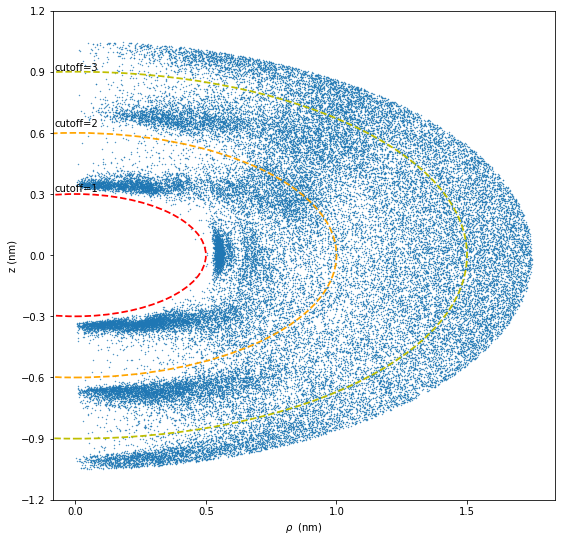

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import seaborn as sns

# find all zero-elements
nonzero = np.where(np.sum(rvecs**2,axis=3)>0.01)
rr = rvecs[nonzero]
# calculate rho and zeta
z = rr[:,2]
rho = np.sqrt(rr[:,0]**2 + rr[:,1]**2)

# make a scatter plot
fig,ax = plt.subplots(figsize=(9,9))
ax.scatter(rho,z,s=0.15)
#ax.set_aspect(1)
patches = []
f1 = 0.5
f2 = 0.3
el = mpatches.Ellipse([0,0], 2*f1,2*f2, fc="none",ec='r',ls="--",lw=1.75)
ax.text(-0.08,f2*1.05,"cutoff=1")
patches.append(el)
el = mpatches.Ellipse([0,0], 4*f1,4*f2, fc="none",ec='orange',ls="--",lw=1.75)
ax.text(-0.08,2*f2*1.05,"cutoff=2")
patches.append(el)
el = mpatches.Ellipse([0,0], 6*f1,6*f2, fc="none",ec='y',ls="--",lw=1.75)
ax.text(-0.08,3*f2*1.005,"cutoff=3")
patches.append(el)
collection = PatchCollection(patches,match_original=True)
ax.add_collection(collection)

ax.set_xlabel(r'$\rho$  (nm)')
ax.set_ylabel('z (nm)')
ax.set_yticks([-1.2,-0.9,-0.6,-0.3,0,0.3,0.6,0.9,1.2])
ax.set_xticks([0,0.5,1.0,1.5])

plt.show()




We can see that high-density points are observed around $(0,0.6)$ (base-pairing), $(0.3,\pm 0.33)$ (base stacking).
Note also the ellipsoid with major axis $a=b=0.5 nm$ and minor axis $c=0.3 nm$ defines a natural metric. 
For values of the scaled distance $|\tilde{r}| = (a^2x^2 + b^2y^2 + c^2z^2)^(1/2) $ smaller than 1 (*cutoff=1*), no points are observed. Base-stacking and base-pairings are observed for cutoff distances smaller than 2.

This is also confirmed by looking at the histogram alon the $z$ coordinate:


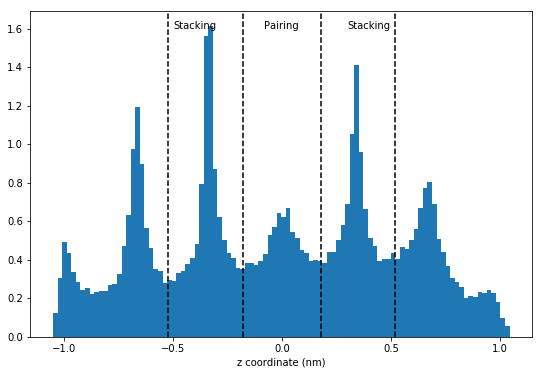

In [58]:
fig,ax = plt.subplots(figsize=(9,6))

plt.hist(z,bins=100,density=True)
plt.axvline(0.18,ls="--",c='k')
plt.axvline(-0.18,ls="--",c='k')
plt.axvline(0.52,ls="--",c='k')
plt.axvline(-0.52,ls="--",c='k')
plt.text(0,1.6,"Pairing",ha ="center")
plt.text(-0.4,1.6,"Stacking",ha ="center")
plt.text(0.4,1.6,"Stacking",ha ="center")
plt.xlabel("z coordinate (nm)")

plt.show()

Another interesting excercise is to consider only the points in the `pairing` slice and project them on the $(x,y)$ plane. 

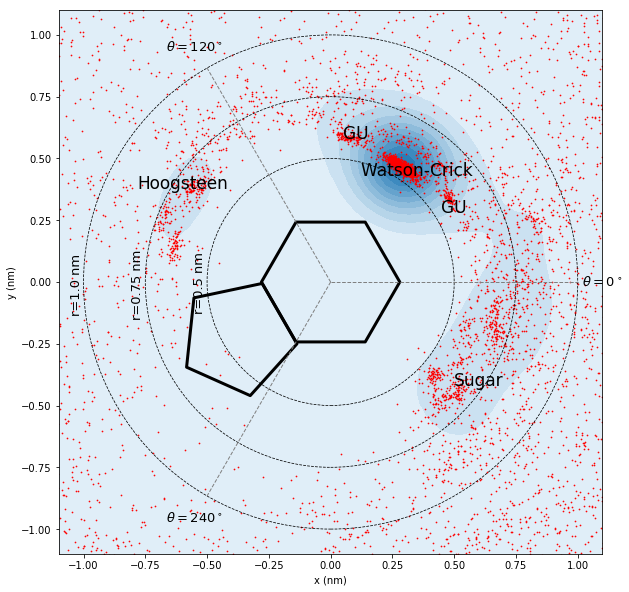

In [59]:
# define an helper function to plot the nucleobase and some distances, as a reference.
def plot_grid():
    patches = []
    polygon = mpatches.RegularPolygon([0,0], 6, 0.28,fc='none',ec='k',lw=3,orientation=+np.pi/2)
    patches.append(polygon)
    polygon = mpatches.RegularPolygon([-0.375,-0.225], 5, 0.24,fc='none',ec='k',lw=3,orientation=-0.42)
    patches.append(polygon)
    circle = mpatches.Circle([0,0], 0.5, fc="none",ec='k',ls="--",lw=0.75)
    plt.text(-0.53,0,"r=0.5 nm",rotation=90,ha="center",va='center',fontsize=13)
    patches.append(circle)
    circle = mpatches.Circle([0,0], 0.75, fc="none",ec='k',ls="--",lw=0.75)
    plt.text(-0.78,0,"r=0.75 nm ",rotation=90,ha="center",va='center',fontsize=13)
    patches.append(circle)
    circle = mpatches.Circle([0,0], 1.0, fc="none",ec='k',ls="--",lw=0.75)
    plt.text(-1.03,0,"r=1.0 nm ",rotation=90,ha="center",va='center',fontsize=13)
    patches.append(circle)
    collection = PatchCollection(patches,match_original=True)
    ax.add_collection(collection)
    
    plt.plot([0,1.],[0,0],c='gray',lw=1,ls="--")
    plt.text(1.1,0,r"$\theta=0^\circ$",ha="center",va='center',fontsize=13)
    plt.plot([0,-np.cos(np.pi/3)],[0,np.sin(np.pi/3)],c='gray',lw=1,ls="--")
    plt.text(-np.cos(np.pi/3)*1.1,np.sin(np.pi/3)*1.1,r"$\theta=120^\circ$",ha="center",va='center',fontsize=13)


    plt.plot([0,-np.cos(np.pi/3)],[0,-np.sin(np.pi/3)],c='gray',lw=1,ls="--")
    plt.text(-np.cos(np.pi/3)*1.1,-np.sin(np.pi/3)*1.1,r"$\theta=240^\circ$",ha="center",va='center',fontsize=13)
    ax.set_aspect(1)
    ax.set_ylim(-1.1,1.1)
    ax.set_xlim(-1.1,1.1)
    ax.set_xlabel("x (nm)")
    ax.set_ylabel("y (nm)")

# slice and take only where |z| is smaller than 0.18 nm
pairs = rr[np.where(np.abs(rr[:,2])<0.18)]

fig,ax = plt.subplots(figsize=(10,10))
# do a KDE 
ax = sns.kdeplot(pairs[:,0],pairs[:,1], shade=True,bw=0.12)
# scatter plot x and y
ax.scatter(pairs[:,0],pairs[:,1],s=0.5,c='r')
# make labels
ax.text(0.35,0.45,"Watson-Crick",fontsize=17,ha='center',va='center',color='k')
ax.text(0.1,0.6,"GU",fontsize=17,ha='center',va='center',color='k')
ax.text(0.5,0.3,"GU",fontsize=17,ha='center',va='center',color='k')
ax.text(-0.6,0.4,"Hoogsteen",fontsize=17,ha='center',va='center',color='k')
ax.text(0.6,-0.4,"Sugar",fontsize=17,ha='center',va='center',color='k')

plot_grid()
plt.show()



The scatterplot above contains all contributions from all types of base-pairs. Still, we can clearly see many points around $(0.4,0.5)$, corresponding to watson-crick base-pairs, wobble GU, hoogsteen and sugar interactions, as labeled.
We can also scatterplot pairs at a fixed "sequence", for example A-U base pairing only:

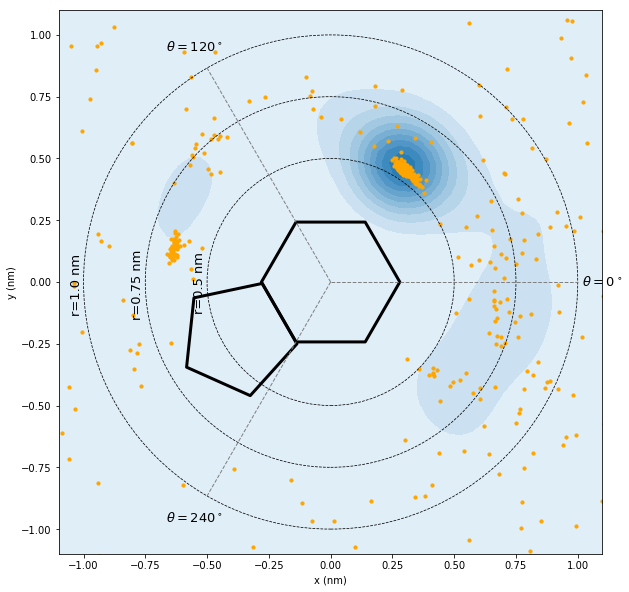

In [60]:

# take only au-pairs. Need an explicit loop. 
pp1 = []
for j in range(len(nonzero[0])):
    z = rvecs[0,nonzero[1][j],nonzero[2][j]][2]
    r1 = res[nonzero[1][j]][0]
    r2 = res[nonzero[2][j]][0]
    if(np.abs(z) < 0.18):
        if((r1=="A" and r2 =="U")):
            pp1.append(rvecs[0,nonzero[1][j],nonzero[2][j]])
            
# plot KDE and scatter
fig,ax = plt.subplots(figsize=(10,10))
pp1 = np.array(pp1)
ax = sns.kdeplot(pairs[:,0],pairs[:,1], shade=True,bw=0.12)
ax.scatter(pp1[:,0],pp1[:,1],s=10,c='orange')
plot_grid()
plt.show()


Note that the distributions shown here are at the core of the eSCORE scoring function. 

Another possible application of the `dump_rvec` function is to analyze trajectories. For example, we can monitor the distance between the center of two six-membered rings during a simulation.  To do so, we use a very large cutoff, so that the only zero vectors are on the diagonal.

In [61]:
traj = "../test/data/UUCG.xtc"
top = "../test/data/UUCG.pdb"
rvecs_traj,res_traj = bb.dump_rvec(traj,topology=top,cutoff=100.0)


# Loading ../test/data/UUCG.xtc 


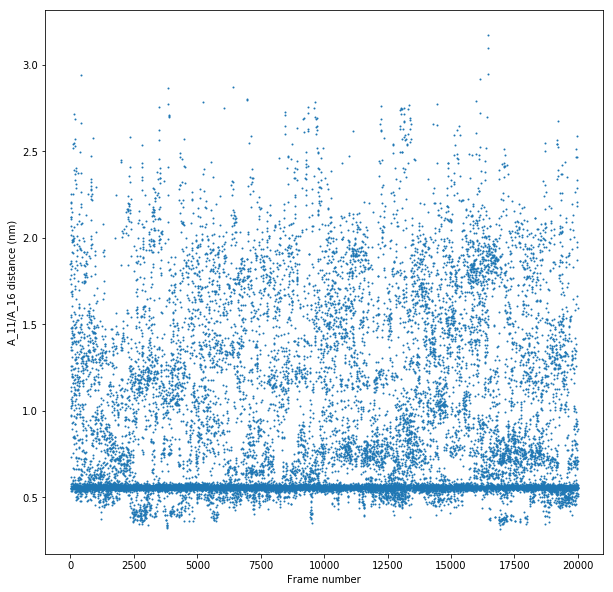

In [62]:
fig,ax = plt.subplots(figsize=(10,10))
dist = np.sqrt(np.sum(rvecs_traj[:,1,6]**2,axis=1))
ax.scatter(np.arange(len(dist)),dist,s=1)
ax.set_xlabel("Frame number")
ax.set_ylabel("%s/%s distance (nm)" % (res[1][:-2],res[6][:-2]))
plt.show()

Note that the base-pair C2-G7 is often formed (distance $\approx 0.57 nm$).
